In [103]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [104]:
df = pd.read_csv('Salary_Data.csv')
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [105]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [106]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())    
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])
df['Job Title'] = df['Job Title'].fillna(df['Job Title'].mode()[0])


In [107]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [108]:

categorical_columns = ['Education Level', 'Gender', 'Job Title']

encoders = {}
category_mappings = {}

for col in categorical_columns: 
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])
    category_mappings[col] = {index: label for index, label in enumerate(encoders[col].classes_)}



In [109]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,177,5.0,90000.0
1,28.0,0,3,18,3.0,65000.0
2,45.0,1,5,145,15.0,150000.0
3,36.0,0,0,116,7.0,60000.0
4,52.0,1,3,26,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,0,5,34,20.0,200000.0
6700,32.0,1,2,116,3.0,50000.0
6701,30.0,0,1,42,4.0,55000.0
6702,46.0,1,4,97,14.0,140000.0


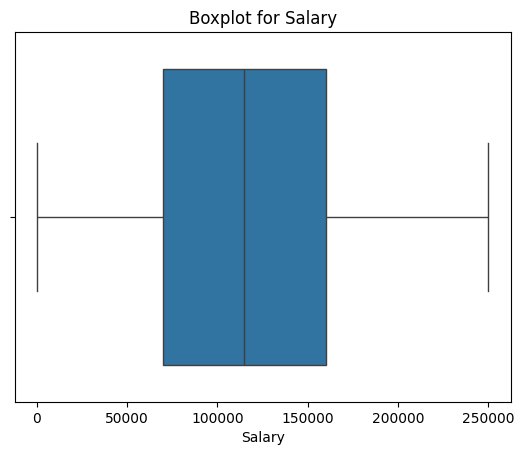

In [110]:
sns.boxplot(x=df['Salary'])
plt.title("Boxplot for Salary")
plt.show()

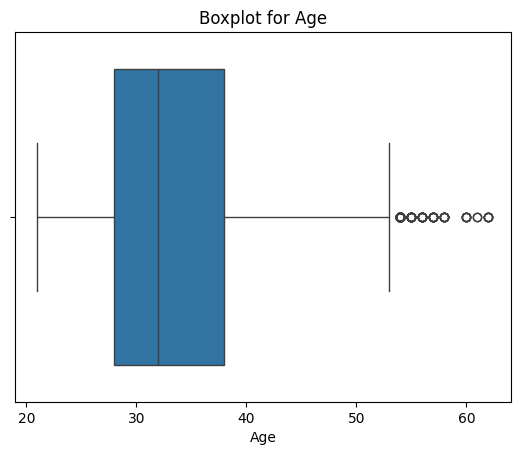

In [111]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot for Age")
plt.show()

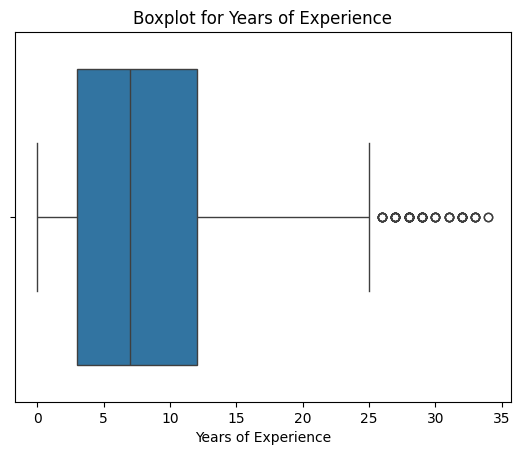

In [112]:
sns.boxplot(x=df['Years of Experience'])
plt.title("Boxplot for Years of Experience")
plt.show()

In [113]:
scalar = StandardScaler()
df[['Age', 'Years of Experience']] = scalar.fit_transform(df[['Age', 'Years of Experience']])

In [114]:
X = df.drop( columns='Salary')
y = df['Salary']

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
X_test

,Age,Gender,Education Level,Job Title,Years of Experience
2794,1.232002,0,5,178,1.800390
2233,0.049802,1,4,3,-0.015632
5559,-0.869686,1,1,177,-0.841097
6355,-0.738331,1,2,118,-1.006190
263,-0.344264,0,0,73,-0.841097
...,...,...,...,...,...
3193,-1.395108,0,1,177,-1.171283
2157,1.626068,1,5,178,1.305111
2202,0.049802,1,4,44,0.149461
1801,1.626068,1,5,159,1.140018


In [117]:
df.dtypes

Age                    float64
Gender                   int64
Education Level          int64
Job Title                int64
Years of Experience    float64
Salary                 float64
dtype: object

In [118]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [119]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 109162.64505399407
Coefficients: [-1.46860728e+04  6.12517743e+03  2.30291487e+03 -3.09641107e+01
  5.42112780e+04]


In [120]:
y_pred = model.predict(X_test)


In [121]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 892668414.6867936


In [122]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.6657536036431556


In [123]:
joblib.dump(model, 'salary_model.pkl')
joblib.dump(category_mappings, 'category_mappings.pkl')

['category_mappings.pkl']

In [124]:
for col, mapping in category_mappings.items():
    print(f"{col}: {mapping}")

Education Level: {0: "Bachelor's", 1: "Bachelor's Degree", 2: 'High School', 3: "Master's", 4: "Master's Degree", 5: 'PhD', 6: 'phD'}
Gender: {0: 'Female', 1: 'Male', 2: 'Other'}
Job Title: {0: 'Account Manager', 1: 'Accountant', 2: 'Administrative Assistant', 3: 'Back end Developer', 4: 'Business Analyst', 5: 'Business Development Manager', 6: 'Business Intelligence Analyst', 7: 'CEO', 8: 'Chief Data Officer', 9: 'Chief Technology Officer', 10: 'Content Marketing Manager', 11: 'Copywriter', 12: 'Creative Director', 13: 'Customer Service Manager', 14: 'Customer Service Rep', 15: 'Customer Service Representative', 16: 'Customer Success Manager', 17: 'Customer Success Rep', 18: 'Data Analyst', 19: 'Data Entry Clerk', 20: 'Data Scientist', 21: 'Delivery Driver', 22: 'Developer', 23: 'Digital Content Producer', 24: 'Digital Marketing Manager', 25: 'Digital Marketing Specialist', 26: 'Director', 27: 'Director of Business Development', 28: 'Director of Data Science', 29: 'Director of Enginee